In this notebook, we demonstrate the use of `cibinfo` to extract and visualize the cross power between the CIB and other tracers of the large-scale structure, such as weak gravitational lensing.

In [77]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import itertools as it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

from cibinfo.powerspectra import crosslensing as cxp
from cibinfo import this_project as P

# Load data

In [3]:
pwd

'/Users/dlenz/software/pymodules/cibinfo/notebooks'

In [27]:
df_data = pd.read_table(
    '../cibinfo/resources/cibxphi/Cl_545_olivier.dat',
    delimiter=' ',
    skiprows=2,
    names=['l', 'l3Cl', 'dl3Cl',],
    usecols=[0,1,2])

In [28]:
df_data.head()

,l,l3Cl,dl3Cl
0,416.666667,0.289167,0.020889
1,543.333333,0.290525,0.019655
2,670.000000,0.233776,0.019096
3,796.666667,0.201171,0.018731
4,923.333333,0.213677,0.019381


In [86]:
df_sim = pd.read_table(
    '../cibinfo/resources/cibxphi/cl_phixT_545.txt',
    delimiter='  ',
    skiprows=3,
    names=['l', 'l3Cl'],
    usecols=[0, 1])

/Users/dlenz/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [87]:
df_sim.head()

,l,l3Cl
0,1,0.050053
1,2,0.180760
2,3,0.371018
3,4,0.605863
4,5,0.874423


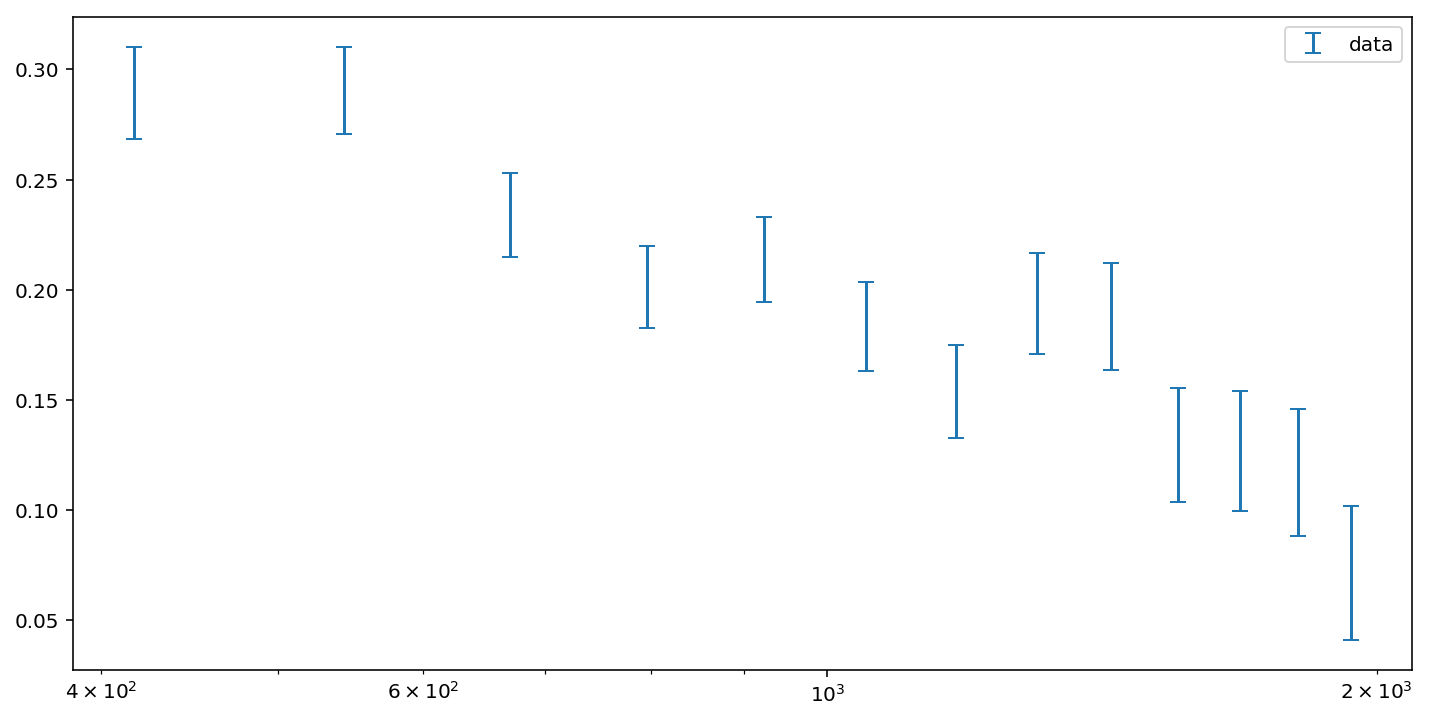

In [50]:
plt.errorbar(
    df_data['l'],
    df_data['l3Cl'],
    yerr=df_data['dl3Cl'],
    label='data',
    ls='None',
    capsize=4.)

# labels & legend
plt.legend()
plt.semilogx();

# Test package

In [134]:
p13 = cxp.Planck2013(857, unit='uK*sr')
model = cxp.Model(857, unit='uK*sr')

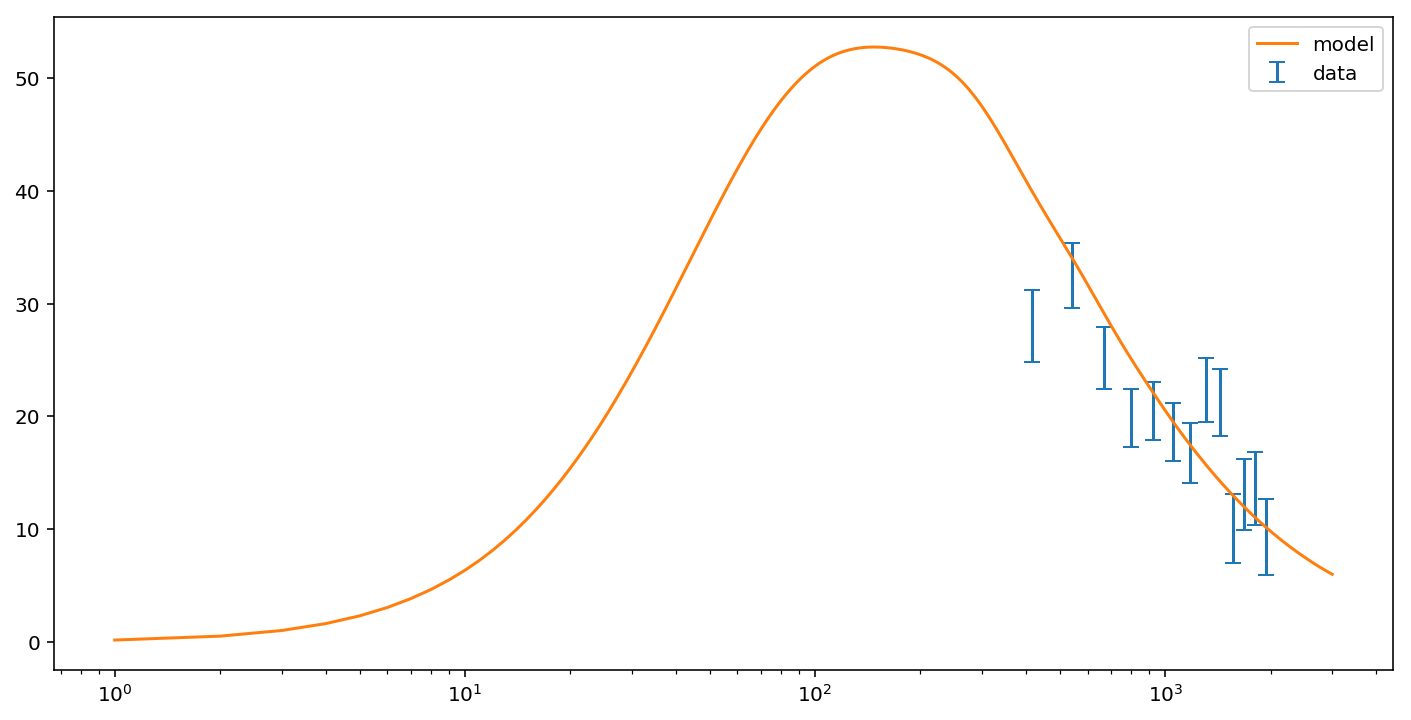

In [135]:
# data
plt.errorbar(
    p13.l,
    p13.l3Cl,
    yerr=p13.dl3Cl,
    label='data',
    ls='None',
    capsize=4.)

# sim
plt.plot(
    model.l,
    model.l3Cl,
    label='model',)

# labels & legend
plt.legend()
plt.semilogx();